<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 19.5 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
# Display missing value counts for critical columns
print("Missing values in critical columns:\n")
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

# Strategy 1: Fill missing values in 'Employment' with the most frequent value
df['Employment'] = df['Employment'].fillna(df['Employment'].mode()[0])

# Strategy 2: Drop rows with missing values in 'JobSat' (assuming this is critical and cannot be imputed)
df = df.dropna(subset=['JobSat'])

# Strategy 3: Fill missing values in 'RemoteWork' with "Not disclosed" or a specific placeholder
df['RemoteWork'] = df['RemoteWork'].fillna("Not disclosed")

# Verify that missing values have been handled
print("\nMissing values after handling:\n")
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

Missing values in critical columns:

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

Missing values after handling:

Employment    0
JobSat        0
RemoteWork    0
dtype: int64


/tmp/ipykernel_523/3717824784.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RemoteWork'] = df['RemoteWork'].fillna("Not disclosed")


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_523/7625375.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
/tmp/ipykernel_523/7625375.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)
/tmp/ipykernel_523/7625375.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

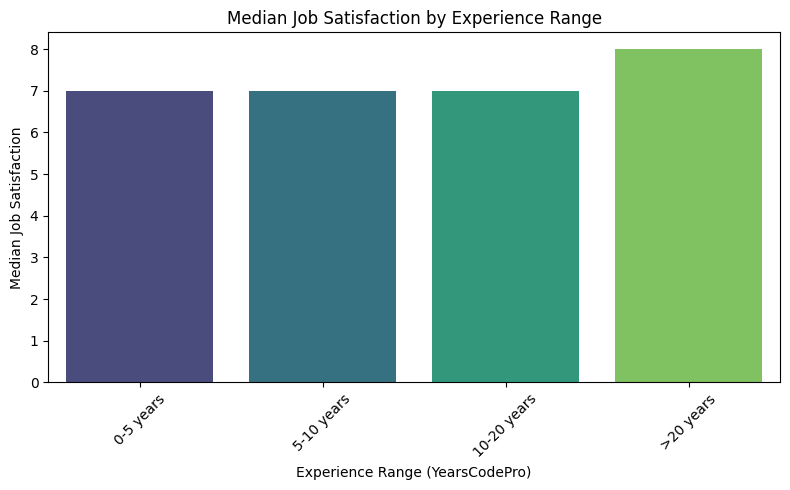

In [5]:
## Write your code here
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert YearsCodePro to numeric and handle non-numeric values
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Define experience ranges
bins = [0, 5, 10, 20, np.inf]
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Convert JobSat to numeric (if necessary) and handle non-numeric values
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Calculate median JobSat for each experience range
median_jobsat_by_experience = df.groupby('ExperienceRange')['JobSat'].median()

# Visualize the relationship using a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=median_jobsat_by_experience.index, y=median_jobsat_by_experience.values, palette="viridis")
plt.title('Median Job Satisfaction by Experience Range')
plt.xlabel('Experience Range (YearsCodePro)')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_523/3386638772.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobSat', palette='viridis', order=df['JobSat'].value_counts().index)


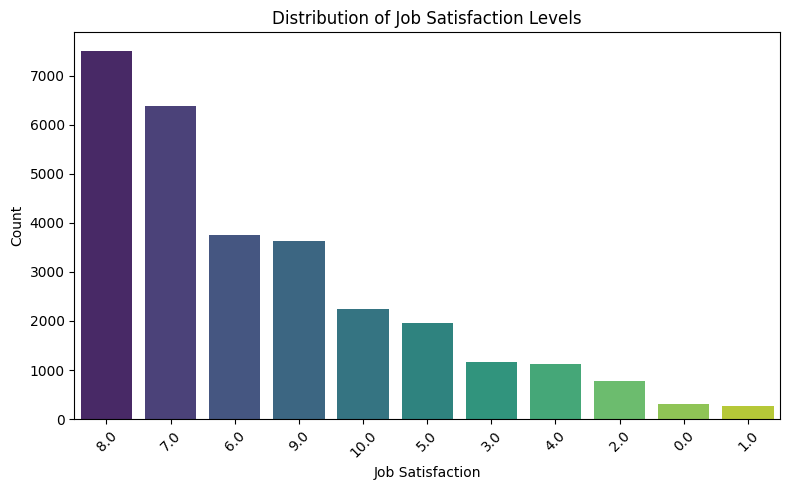

In [6]:
## Write your code here
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='JobSat', palette='viridis', order=df['JobSat'].value_counts().index)
plt.title('Distribution of Job Satisfaction Levels')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_523/334624167.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', palette='viridis', order=df['RemoteWork'].value_counts().index)


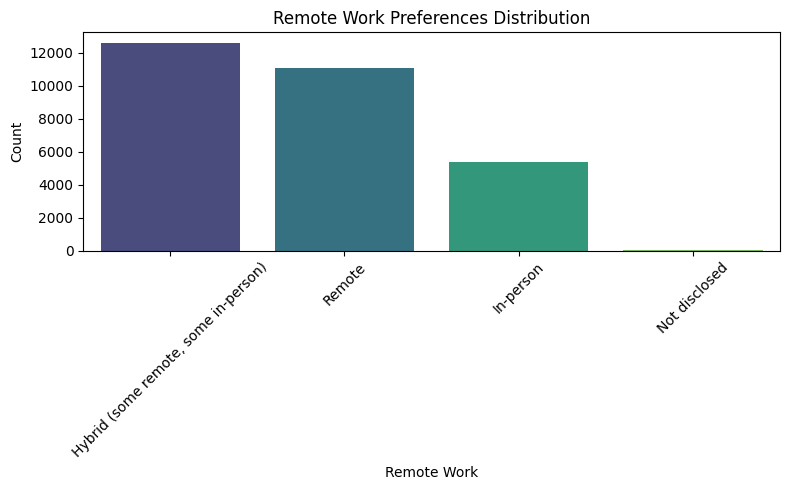

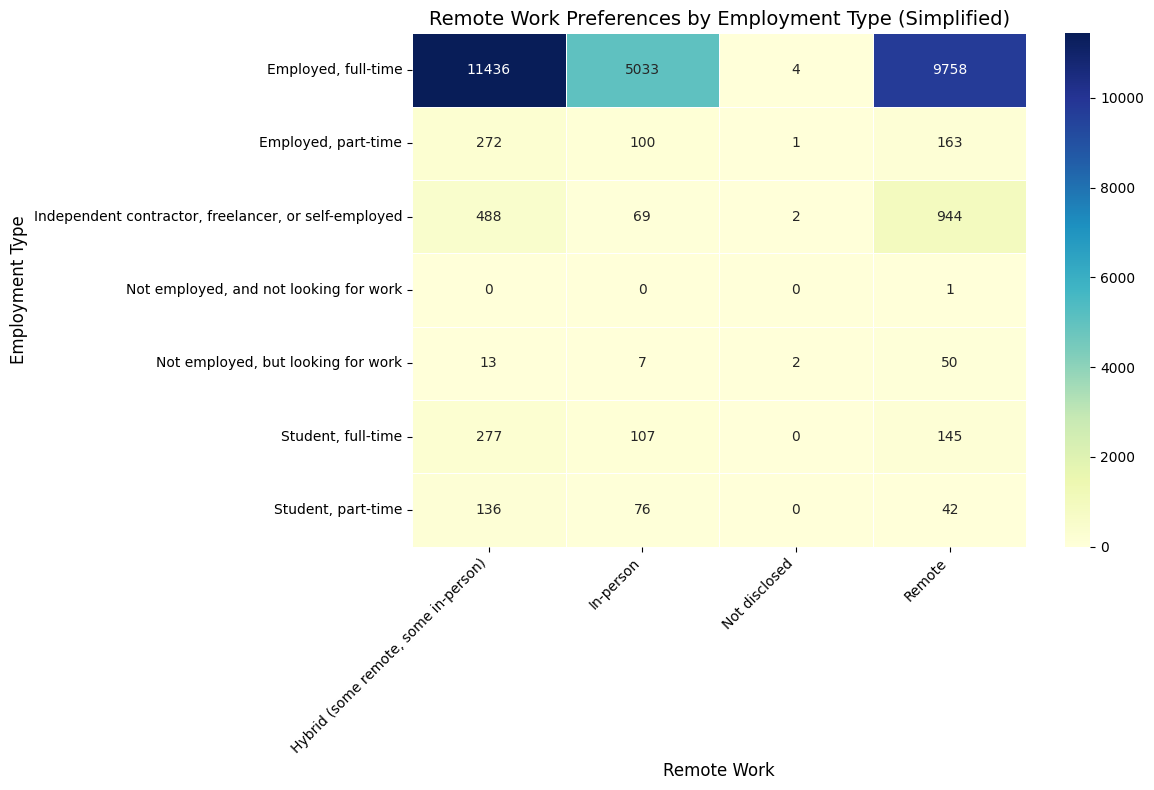

In [8]:
## Write your code here
# Create a count plot for RemoteWork distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='RemoteWork', palette='viridis', order=df['RemoteWork'].value_counts().index)
plt.title('Remote Work Preferences Distribution')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cross-tabulate RemoteWork preferences by Employment type and Job Role
# Simplify Employment types and RemoteWork categories (optional)
df['Employment'] = df['Employment'].str.split(';').str[0]  # Keep only the first job role for clarity

# Generate a cross-tabulation with simplified categories
remote_work_crosstab = pd.crosstab(df['Employment'], df['RemoteWork'])

# Plot an updated heatmap with better readability
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.heatmap(remote_work_crosstab, annot=True, fmt="d", cmap="YlGnBu", cbar=True, linewidths=0.5)

# Update labels and title
plt.title('Remote Work Preferences by Employment Type (Simplified)', fontsize=14)
plt.xlabel('Remote Work', fontsize=12)
plt.ylabel('Employment Type', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


Unique values in the 'Country' column:
 ['United States of America' 'Switzerland' 'Germany' 'Ireland' 'Italy'
 'Ukraine' 'Japan' 'Brazil' 'Austria' 'Romania'
 'United Kingdom of Great Britain and Northern Ireland' 'Bulgaria'
 'Turkey' 'Sweden' 'Croatia' 'Pakistan' 'Czech Republic'
 'Republic of North Macedonia' 'Finland' 'Slovakia' 'Poland' 'India'
 'Greece' 'United Republic of Tanzania' 'Sri Lanka' 'Netherlands' 'Latvia'
 'Portugal' 'Singapore' 'China' 'Philippines' 'Spain' 'Russian Federation'
 'Canada' 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Serbia' 'Morocco'
 'France' 'Taiwan' 'San Marino' 'Tunisia' 'Bangladesh' 'Nigeria'
 'Australia' 'Ecuador' 'Mexico' 'Albania' 'Israel' 'South Africa' 'Chile'
 'Lebanon' 'Iran, Islamic Republic of...' 'Algeria' 'Bolivia' 'Georgia'
 'Saudi Arabia' 'Cyprus' 'Paraguay' 'Slovenia' 'Costa Rica' 'Norway'
 'Jamaica' 'Denmark' 'Rwanda' 'Hungary' 'Indonesia'
 'Bosnia and Herzegovina' 'Thailand' 'Argentina' 'Peru'
 'Venezuela, Bolivarian Republic of...

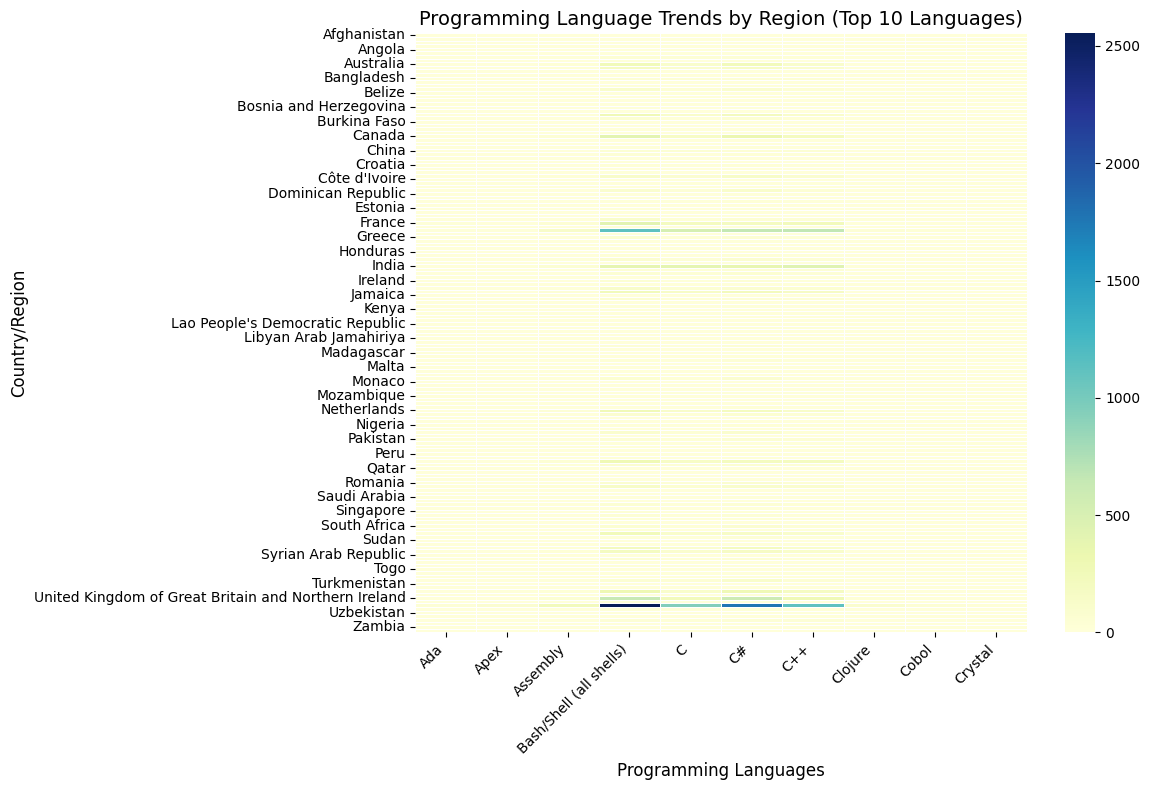

In [10]:
## Write your code here
# Verify the unique values in the 'Country' column
print("Unique values in the 'Country' column:\n", df['Country'].unique())

# Check if the selected region has data in 'LanguageHaveWorkedWith'
region_data = df[df['Country'] == 'United States']
if region_data.empty:
    print("No data found for the selected region ('United States').")
else:
    # Split the 'LanguageHaveWorkedWith' column into individual languages
    languages = region_data['LanguageHaveWorkedWith'].dropna().str.split(';').explode()
    if languages.empty:
        print("No programming language data found for the selected region.")
    else:
        # Count the occurrences of each language
        language_counts = languages.value_counts()

        # Visualize the top programming languages by region using a bar plot
        plt.figure(figsize=(10, 6))
        language_counts.head(10).plot(kind='bar', color='skyblue')
        plt.title('Top Programming Languages in the United States', fontsize=14)
        plt.xlabel('Programming Language', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.tight_layout()
        plt.show()

# Optional: Heatmap for multiple regions (if available)
if not df['LanguageHaveWorkedWith'].isnull().all():
    languages_by_region = (
        df.dropna(subset=['LanguageHaveWorkedWith', 'Country'])
        .assign(Language=df['LanguageHaveWorkedWith'].str.split(';'))
        .explode('Language')
        .groupby(['Country', 'Language'])
        .size()
        .unstack(fill_value=0)
    )

    # Plot the heatmap for the top 10 programming languages across multiple regions
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        languages_by_region.iloc[:, :10], cmap="YlGnBu", cbar=True, linewidths=0.5, annot=False
    )
    plt.title('Programming Language Trends by Region (Top 10 Languages)', fontsize=14)
    plt.xlabel('Programming Languages', fontsize=12)
    plt.ylabel('Country/Region', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("No programming language data found for any region.")

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


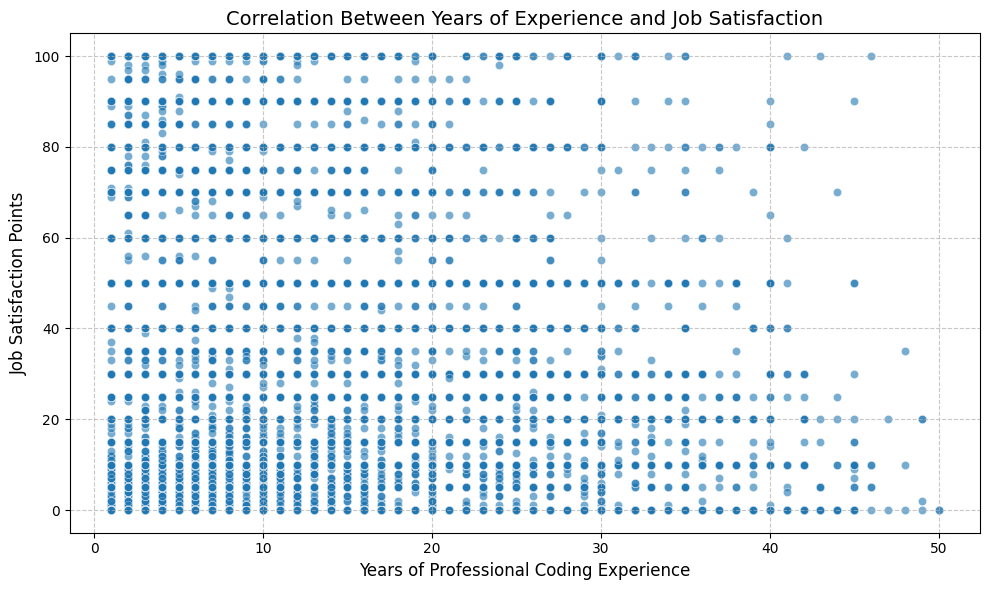

Correlation Coefficient: -0.04


In [11]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Step 8: Correlation Between Experience and Satisfaction

# Ensure 'YearsCodePro' and 'JobSatPoints_1' are numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

# Drop rows with missing values in these columns
correlation_data = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=correlation_data, x='YearsCodePro', y='JobSatPoints_1', alpha=0.6)
plt.title('Correlation Between Years of Experience and Job Satisfaction', fontsize=14)
plt.xlabel('Years of Professional Coding Experience', fontsize=12)
plt.ylabel('Job Satisfaction Points', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Optional: Calculate and display the correlation coefficient
correlation_coefficient = correlation_data['YearsCodePro'].corr(correlation_data['JobSatPoints_1'])
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Cross-tabulation of Educational Background and Employment Type:

Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                 817   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      12053   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                    7664   
Primary/elementary school                                           122   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     1294   
Secondary school (e.g. American high school, Ge...                 1143   
Some college/university study without earning a...                 2878   
Something else                                                      260   

Employment                                          Employed, part-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.

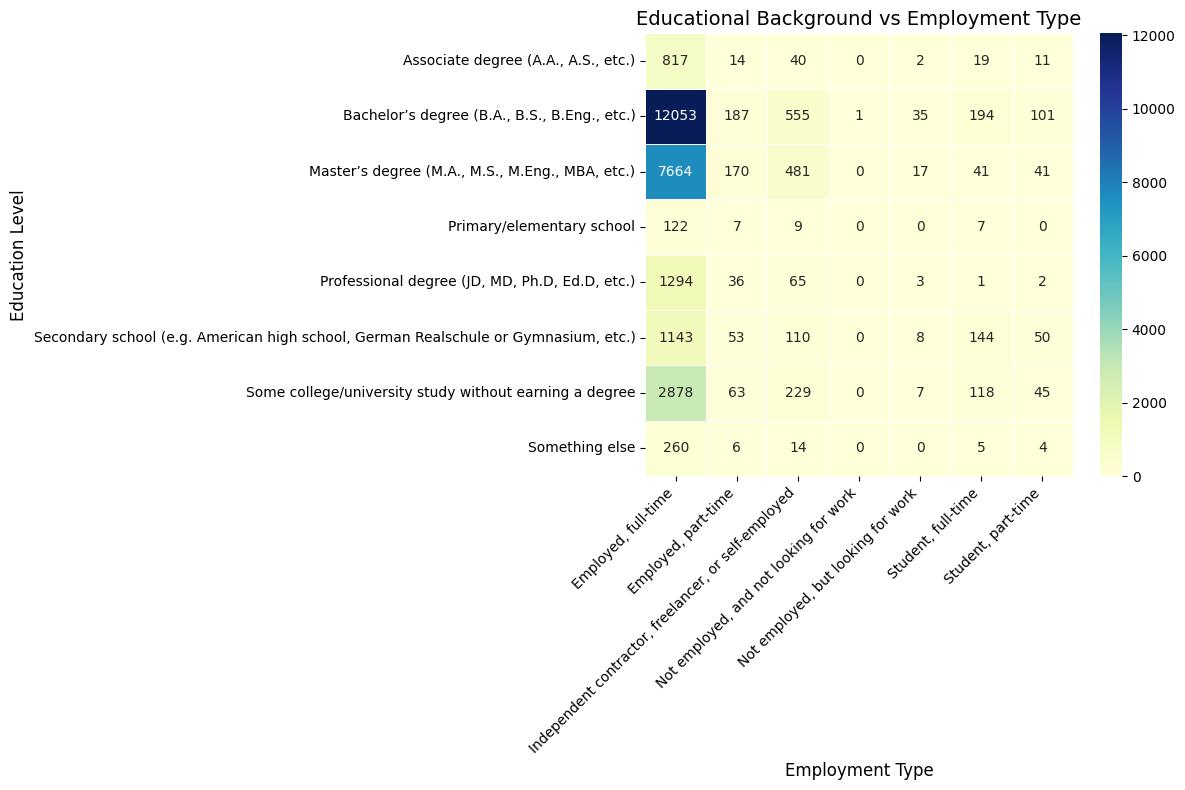

In [12]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 9: Educational Background and Employment Type

# Cross-tabulate education level (EdLevel) and employment type (Employment)
education_employment_crosstab = pd.crosstab(df['EdLevel'], df['Employment'])

# Display the cross-tabulation
print("Cross-tabulation of Educational Background and Employment Type:\n")
print(education_employment_crosstab)

# Visualize the relationship using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(education_employment_crosstab, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title('Educational Background vs Employment Type', fontsize=14)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [13]:
## Write your code here
# Define the file path and name for the cleaned dataset
output_file = "cleaned_analyzed_dataset.csv"

# Save the modified DataFrame to a CSV file
df.to_csv(output_file, index=False)

print(f"Cleaned and analyzed dataset saved as '{output_file}'.")

Cleaned and analyzed dataset saved as 'cleaned_analyzed_dataset.csv'.


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
